### 使用Tensflow实现梯度下降

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [16]:
x_data = np.linspace(-10., 10., 1000, endpoint = False)
y_data = 3. * x_data + 4. + np.random.normal(size=len(x_data))

# 打乱顺序
x_indexs = np.random.permutation(len(x_data))
x_data = x_data[x_indexs]
y_data = y_data[x_indexs]

LR = 0.01 #学习率 
n_iters = 1000 #训练次数

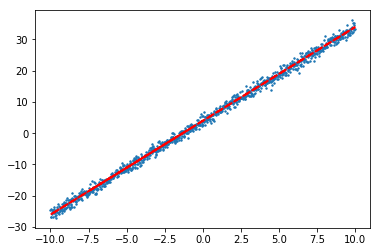

Predicted model: [3.001656]x + [3.94485]
CPU times: user 740 ms, sys: 89 ms, total: 829 ms
Wall time: 559 ms


In [18]:
%%time

# x 和 y 是我们的训练数据的占位符
x = tf.placeholder("float")
y = tf.placeholder("float")

# w 是存储我们的值的变量。 它使用“猜测”来初始化
w = tf.Variable([0.], name="w")
b = tf.Variable([0.],name="b")

# 我们的模型是 y = w * x + b
y_model = w * x + b

# 我们的误差定义为均方误差
loss = tf.reduce_mean(tf.square(y - y_model))

# GradientDescentOptimizer 完成繁重的工作
optimizer = tf.train.GradientDescentOptimizer(LR)
train_op = optimizer.minimize(loss)

with tf.Session() as session:
    # TensorFlow 常规 - 初始化值，创建会话并运行模型
    tf.global_variables_initializer().run()
    
    for i in range(n_iters):
        x_value = x_data
        y_value = y_data
#         x_value = x_dati[i]
#         y_value = y_data[i]
        loss_,w_,b_ = session.run([train_op,w,b], feed_dict={x: x_value, y: y_value})
#         print("step:{i},w:{w_:.3f},b:{b_:.3f}".format(**locals()))  #训练过程
    
    plt.scatter(x_data,y_data,s=2)
    plt.plot(x_data, w_ * x_data + b_, color='red', linewidth=2.0, linestyle='--')
    plt.show()
    
    print("Predicted model: {a}x + {b}".format(a=w_, b=b_))

### 多元梯度下降

In [42]:
m=1000
n=10
X_data = np.random.random(size=(m,n))
true_W = np.arange(1,n+1,dtype=float)
true_b = 6
y_data = np.sum(true_W * X,axis=1) + true_b

LR = 0.01 #学习率 
n_iters = 1000 #训练次数

ValueError: operands could not be broadcast together with shapes (10,) (1000,) 

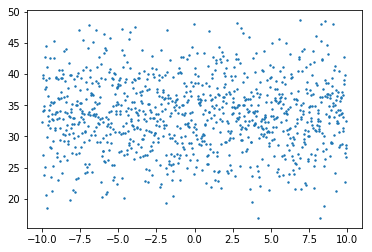

In [49]:
%%time

# x 和 y 是我们的训练数据的占位符
X = tf.placeholder("float")
y = tf.placeholder("float")

# w 是存储我们的值的变量。 它使用“猜测”来初始化
W = tf.Variable(tf.zeros([n],dtype=tf.float32), name="w")
b = tf.Variable(tf.zeros([1],dtype=tf.float32),name="b")

# 我们的模型是 y = w * x + b
y_model = tf.reduce_sum(W * X,1) + b

# 我们的误差定义为均方误差
loss = tf.reduce_mean(tf.square(y - y_model))

# GradientDescentOptimizer 完成繁重的工作
optimizer = tf.train.GradientDescentOptimizer(LR)
train_op = optimizer.minimize(loss)

with tf.Session() as session:
    # TensorFlow 常规 - 初始化值，创建会话并运行模型
    tf.global_variables_initializer().run()
    
    for i in range(n_iters):
        x_value = X_data
        y_value = y_data
#         x_value = x_dati[i]
#         y_value = y_data[i]
        loss_,w_,b_ = session.run([train_op,W,b], feed_dict={X: x_value, y: y_value})
#         print("step:{i},w:{w_:.3f},b:{b_:.3f}".format(**locals()))  #训练过程
    
    plt.scatter(x_data,y_data,s=2)
    plt.plot(x_data, w_ * x_data + b_, color='red', linewidth=2.0, linestyle='--')
    plt.show()
    
    print("Predicted model: {a}x + {b}".format(a=w_, b=b_))